# Lidando com os dados

Realizando as importações

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

Criando os dataframes iniciais

In [2]:
treino = pd.read_csv('data/train.csv')
final = pd.read_csv('data/test.csv')

Visualização Inicial dos dataframes

In [3]:
def ver_colunas(dataset):
    colunas = dataset.columns
    view_colunas = ''
    for coluna in colunas:
        view_colunas += f'  -  {coluna}'
    print(view_colunas)

ver_colunas(treino)

  -  Id  -  Elevation  -  Aspect  -  Slope  -  Horizontal_Distance_To_Hydrology  -  Vertical_Distance_To_Hydrology  -  Horizontal_Distance_To_Roadways  -  Hillshade_9am  -  Hillshade_Noon  -  Hillshade_3pm  -  Horizontal_Distance_To_Fire_Points  -  Wilderness_Area1  -  Wilderness_Area2  -  Wilderness_Area3  -  Wilderness_Area4  -  Soil_Type1  -  Soil_Type2  -  Soil_Type3  -  Soil_Type4  -  Soil_Type5  -  Soil_Type6  -  Soil_Type7  -  Soil_Type8  -  Soil_Type9  -  Soil_Type10  -  Soil_Type11  -  Soil_Type12  -  Soil_Type13  -  Soil_Type14  -  Soil_Type15  -  Soil_Type16  -  Soil_Type17  -  Soil_Type18  -  Soil_Type19  -  Soil_Type20  -  Soil_Type21  -  Soil_Type22  -  Soil_Type23  -  Soil_Type24  -  Soil_Type25  -  Soil_Type26  -  Soil_Type27  -  Soil_Type28  -  Soil_Type29  -  Soil_Type30  -  Soil_Type31  -  Soil_Type32  -  Soil_Type33  -  Soil_Type34  -  Soil_Type35  -  Soil_Type36  -  Soil_Type37  -  Soil_Type38  -  Soil_Type39  -  Soil_Type40  -  Cover_Type


Traduzindo as colunas

In [4]:
#Não há necessidade de traduzir os Soil_TypeX ou os Wilderness_AreaX

dict_traducao = {'Elevation': 'Elevação','Aspect':'Azimute','Slope':'Declive', 'Horizontal_Distance_To_Hydrology':'H_Dist_Hidrologia',
'Vertical_Distance_To_Hydrology':'V_Dist_Hidrologia','Horizontal_Distance_To_Roadways':'H_Dist_Estradas',
'Hillshade_9am':'Sombra_09h','Hillshade_Noon':'Sombra_12h','Hillshade_3pm':'Sombra_15h',
'Horizontal_Distance_To_Fire_Points':'H_Dist_Foco_Incêndio','Cover_Type':'Tipo_Vegetação'}

treino.rename(columns=dict_traducao, inplace = True)
final.rename(columns=dict_traducao, inplace = True)

ver_colunas(treino)

  -  Id  -  Elevação  -  Azimute  -  Declive  -  H_Dist_Hidrologia  -  V_Dist_Hidrologia  -  H_Dist_Estradas  -  Sombra_09h  -  Sombra_12h  -  Sombra_15h  -  H_Dist_Foco_Incêndio  -  Wilderness_Area1  -  Wilderness_Area2  -  Wilderness_Area3  -  Wilderness_Area4  -  Soil_Type1  -  Soil_Type2  -  Soil_Type3  -  Soil_Type4  -  Soil_Type5  -  Soil_Type6  -  Soil_Type7  -  Soil_Type8  -  Soil_Type9  -  Soil_Type10  -  Soil_Type11  -  Soil_Type12  -  Soil_Type13  -  Soil_Type14  -  Soil_Type15  -  Soil_Type16  -  Soil_Type17  -  Soil_Type18  -  Soil_Type19  -  Soil_Type20  -  Soil_Type21  -  Soil_Type22  -  Soil_Type23  -  Soil_Type24  -  Soil_Type25  -  Soil_Type26  -  Soil_Type27  -  Soil_Type28  -  Soil_Type29  -  Soil_Type30  -  Soil_Type31  -  Soil_Type32  -  Soil_Type33  -  Soil_Type34  -  Soil_Type35  -  Soil_Type36  -  Soil_Type37  -  Soil_Type38  -  Soil_Type39  -  Soil_Type40  -  Tipo_Vegetação


### Tratando os Dados

In [5]:
#Verificando dados nulos
treino.isnull().values.any() and final.isnull().values.any()
#Não existem dados nulos

False

In [6]:
#Verificando as colunas constantes
constantes = []
for coluna in treino.columns:
    if len(treino[coluna].value_counts()) == 1:
        constantes.append(coluna)
print(constantes)

#Os solos 7 e 15 são constantes, portanto serão eliminados dos dataframes

treino.drop('Soil_Type7',axis=1,inplace=True)
treino.drop('Soil_Type15',axis=1,inplace=True)

final.drop('Soil_Type7',axis=1,inplace=True)
final.drop('Soil_Type15',axis=1,inplace=True)


['Soil_Type7', 'Soil_Type15']


In [7]:
#Criando uma coluna única para o solo e para a região selvagem

conjunto = [treino,final]
for dataframe in conjunto:
    lista_solos = [f'Soil_Type{i}' for i in range(1,41) if i not in [7,15]]
    solos=dataframe[lista_solos]
    regiao=dataframe[['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4']]

    s= pd.DataFrame([x for x in np.where(solos ==1, solos.columns,'').flatten().tolist() if len(x) >0],columns= (['Solos']))
    r= pd.DataFrame([x for x in np.where(regiao ==1, regiao.columns,'').flatten().tolist() if len(x) >0],columns= (['Região']))

    dict = {f'Soil_Type{i}':i for i in range(1,41) if i not in [7,15]}
    dict1 = {f'Wilderness_Area{i}':i for i in range(1,5)}

    dataframe['Solos']=s['Solos'].map(dict)
    dataframe['Região']=r['Região'].map(dict1)
    dataframe['Solos'].fillna(0,inplace=True)

In [8]:
#Criando coluna de rochas, baseado no tipo de solo, a partir dos dados no kaggle
dict_rocha = {0:6, 1: 1, 2: 2, 3: 3, 4: 3, 5: 3, 6: 4, 7: 6, 8: 6, 9: 2, 10: 3, 11: 3, 12: 4, 13: 3, 14: 6, 15: 6, 16: 6, 17: 6, 
18: 2, 19: 6, 20: 6, 21: 6, 22: 5, 23: 6, 24: 1, 25: 1, 26: 2, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 6, 36: 1, 
37: 1, 38: 1, 39: 1, 40: 1}

for dataframe in conjunto:
    lista=[]
    for i in dataframe.Solos:
        lista.append(dict_rocha[int(i)])
    dataframe['Rochosidade'] = lista

In [9]:
#Criando coluna com distância absoluta da agua
for data in conjunto:
    data['Dist_Hidrologia'] = (data['H_Dist_Hidrologia']**2 + data['V_Dist_Hidrologia']**2)**0.5

In [10]:
#Verificando viés nos dados
print(treino.drop(lista_solos,axis=1).skew().where(treino.skew() < -1.2).dropna())
print(treino.drop(lista_solos,axis=1).skew().where(treino.skew() > 1.2).dropna())

#Com isso, podemos perceber que as colunas de Solo e Área possuem um alto viés. Apesar disso, não as alteraremos.
#Porém as colunas V_Dist_Hidrologia e H_Dist_Foco_Incêndio serão alteradas reduzindo sua escala.


#AUMENTAR O SKEW **
def escalando(dataframe):
    lista = []
    lista2 = []
    for i in dataframe['V_Dist_Hidrologia']:
        lista.append(math.sqrt(abs(i)))
        lista2.append(i**2)
    dataframe['sqrt_V_Dist_Hidrologia'] = lista
    dataframe['pow_V_Dist_Hidrologia'] = lista2

    lista = []
    lista2 = []
    for i in dataframe['H_Dist_Foco_Incêndio']:
        lista.append(math.sqrt(abs(i)))
        lista2.append(i**2)
    dataframe['sqrt_H_Dist_Foco_Incêndio'] = lista
    dataframe['pow_H_Dist_Foco_Incêndio'] = lista2

    lista = []
    lista2 = []
    for i in dataframe['H_Dist_Hidrologia']:
        lista.append(math.sqrt(abs(i)))
        lista2.append(i**2)
    dataframe['sqrt_H_Dist_Hidrologia'] = lista
    dataframe['pow_H_Dist_Hidrologia'] = lista2

    lista = []
    lista2 = []
    for i in dataframe['H_Dist_Estradas']:
        lista.append(math.sqrt(abs(i)))
        lista2.append(i**2)
    dataframe['sqrt_H_Dist_Estradas'] = lista
    dataframe['pow_H_Dist_Estradas'] = lista2

    lista = []
    lista2 = []
    for i in dataframe['Dist_Hidrologia']:
        lista.append(math.sqrt(abs(i)))
        lista2.append(i**2)
    dataframe['sqrt_Dist_Hidrologia'] = lista
    dataframe['pow_Dist_Hidrologia'] = lista2

escalando(treino)
escalando(final)

Series([], dtype: float64)
H_Dist_Hidrologia       1.488052
V_Dist_Hidrologia       1.537776
H_Dist_Estradas         1.247811
H_Dist_Foco_Incêndio    1.617099
Wilderness_Area1        1.231244
Wilderness_Area2        5.228781
Dist_Hidrologia         1.442072
dtype: float64


In [11]:
#Criando dataframes separados para cada tipo de região a fim de reduzir o número de vegetações possíveis para cada região

index = 0
for dataframe in conjunto:
    if index == 0:
        nome = 'treino'
    else:
        nome = 'final'
    for i in range(1,5):
        globals()[f"df_regiao{i}_{nome}"] = dataframe.groupby('Região').get_group(i)
    index += 1

In [12]:
#Visualização do dataframe
treino.head()

Id  Elevação  Azimute  Declive  H_Dist_Hidrologia  V_Dist_Hidrologia  \
0   1      2596       51        3                258                  0   
1   2      2590       56        2                212                 -6   
2   3      2804      139        9                268                 65   
3   4      2785      155       18                242                118   
4   5      2595       45        2                153                 -1   

   H_Dist_Estradas  Sombra_09h  Sombra_12h  Sombra_15h  ...  \
0              510         221         232         148  ...   
1              390         220         235         151  ...   
2             3180         234         238         135  ...   
3             3090         238         238         122  ...   
4              391         220         234         150  ...   

   sqrt_V_Dist_Hidrologia  pow_V_Dist_Hidrologia  sqrt_H_Dist_Foco_Incêndio  \
0                0.000000                      0                  79.240141   
1                2.449490                     36                  78.898669   
2                8.062258                   4225                  78.236820   
3               10.862780                  13924                  78.809898   
4                1.000000                      1                  78.562077   

   pow_H_Dist_Foco_Incêndio  sqrt_H_Dist_Hidrologia  pow_H_Dist_Hidrologia  \
0                  39425841               16.062378                  66564   
1                  38750625               14.560220                  44944   
2                  37466641               16.370706                  71824   
3                  38576521               15.556349                  58564   
4                  38093584               12.369317                  23409   

   sqrt_H_Dist_Estradas  pow_H_Dist_Estradas  sqrt_Dist_Hidrologia  \
0             22.583180               260100             16.062378   
1             19.748418               152100             14.563135   
2             56.391489             10112400             16.606319   
3             55.587768              9548100             16.408411   
4             19.773720               152881             12.369449   

   pow_Dist_Hidrologia  
0              66564.0  
1              44980.0  
2              76049.0  
3              72488.0  
4              23410.0  

[5 rows x 68 columns]

### Visualizando os dados


<AxesSubplot:xlabel='Dist_Hidrologia', ylabel='Density'>

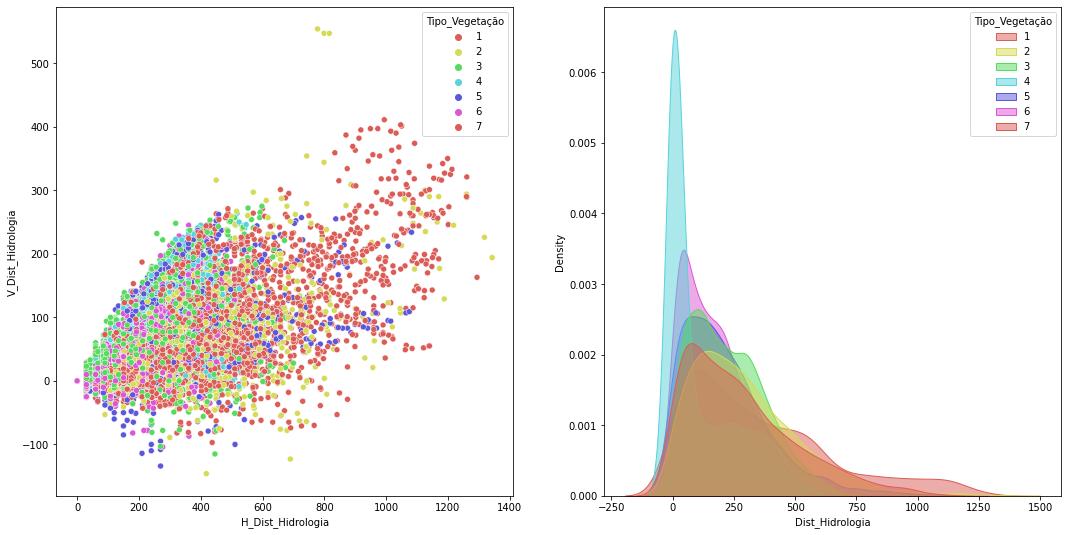

In [13]:
#Esses gráficos mostram os tipos de vegetação baseado na distância da água
#Assim, podemos perceber que quanto mais distante da água menor a variedade das vegetações
#Quanto mais distante da água, a vegetação tende a ser 2 ou 7

plt.rcParams["figure.figsize"]=18,9
fig, ax = plt.subplots(1, 2)
sns.scatterplot(data = treino, hue="Tipo_Vegetação", palette="hls",
x='H_Dist_Hidrologia', y='V_Dist_Hidrologia',ax=ax[0])

sns.kdeplot(data=treino, x="Dist_Hidrologia", hue="Tipo_Vegetação", fill=True, common_norm=False, alpha=0.5, palette="hls", ax=ax[1])

C:\Users\lucas\AppData\Local\Temp\ipykernel_15544\3600210739.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


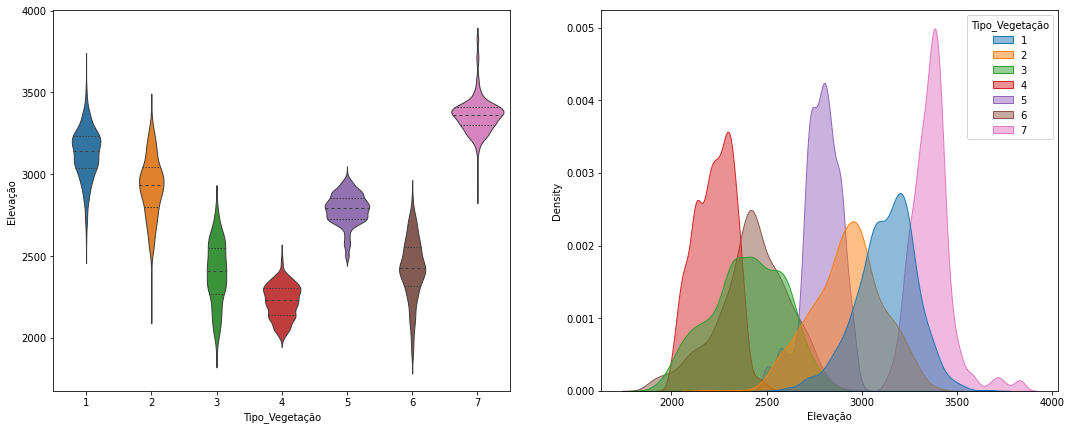

In [14]:
#Esses gráficos mostram os tipos de vegetação baseado na elevação
#Assim, podemos perceber que os tipos diferentes de vegetação possuem diferentes distrubuições ideais de altitude
plt.rcParams["figure.figsize"]=18,7
fig, ax = plt.subplots(1, 2)
sns.violinplot(data = treino ,x='Tipo_Vegetação', y='Elevação', inner="quart",split=True, linewidth=1, ax=ax[0])
sns.kdeplot(data=treino, x="Elevação", hue="Tipo_Vegetação", fill=True, common_norm=False, alpha=0.5, palette="tab10", ax=ax[1])
fig.show()

<AxesSubplot:>

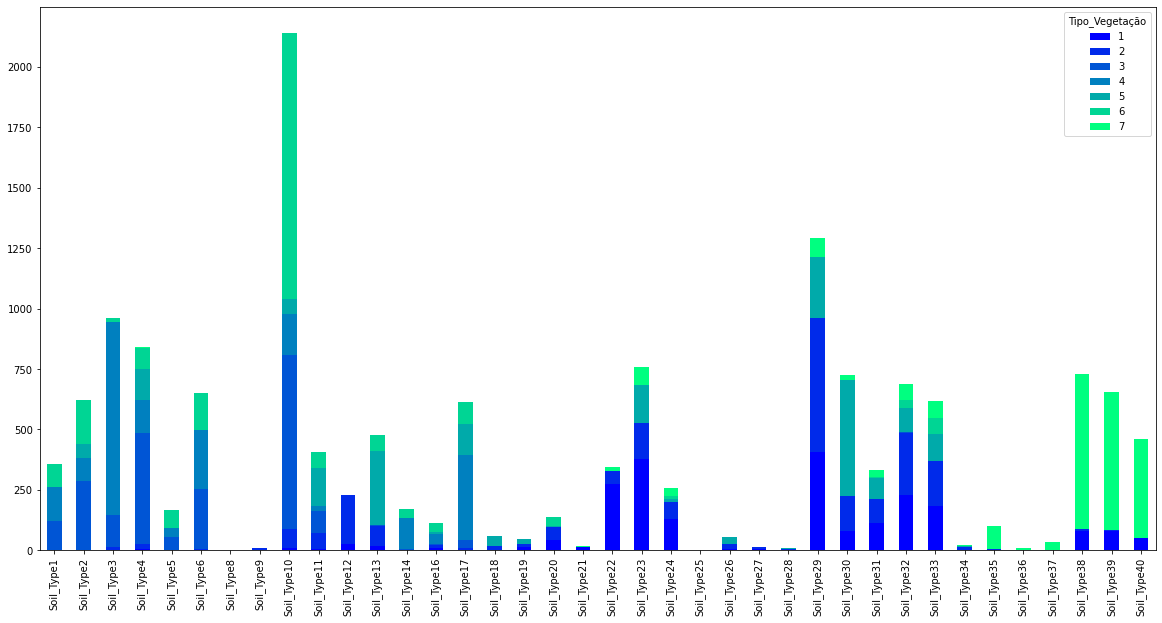

In [15]:
#Esse gráfico mostra a quantidade dos tipos de vegetação pelo solo
#Assim, podemos perceber que os tipos diferentes de vegetação possuem diferentes solos ideais

solos = treino[lista_solos + ['Tipo_Vegetação']].groupby('Tipo_Vegetação').sum()
plt.rcParams["figure.figsize"]=20,10
solos.T.plot(kind='bar',stacked=True,colormap='winter')


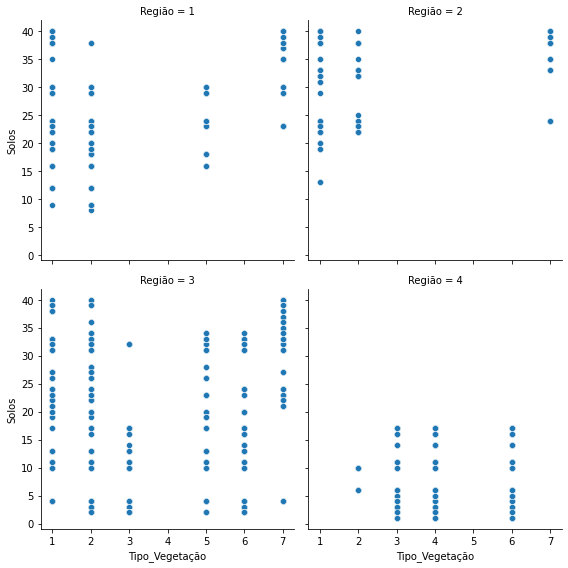

In [16]:
#Esse gráfico mostra a quantidade dos tipos de vegetação pelo solo
#Assim, podemos perceber que a terceira regiao analisada é aquela que apresnta maior biodiversidade.

srv = pd.DataFrame()
srv = treino[['Solos','Região','Tipo_Vegetação']]


grafico5 = sns.FacetGrid(srv, col='Região', height=4,col_wrap=2)
grafico5.map(sns.scatterplot,'Tipo_Vegetação','Solos')

<AxesSubplot:xlabel='H_Dist_Estradas', ylabel='H_Dist_Foco_Incêndio'>

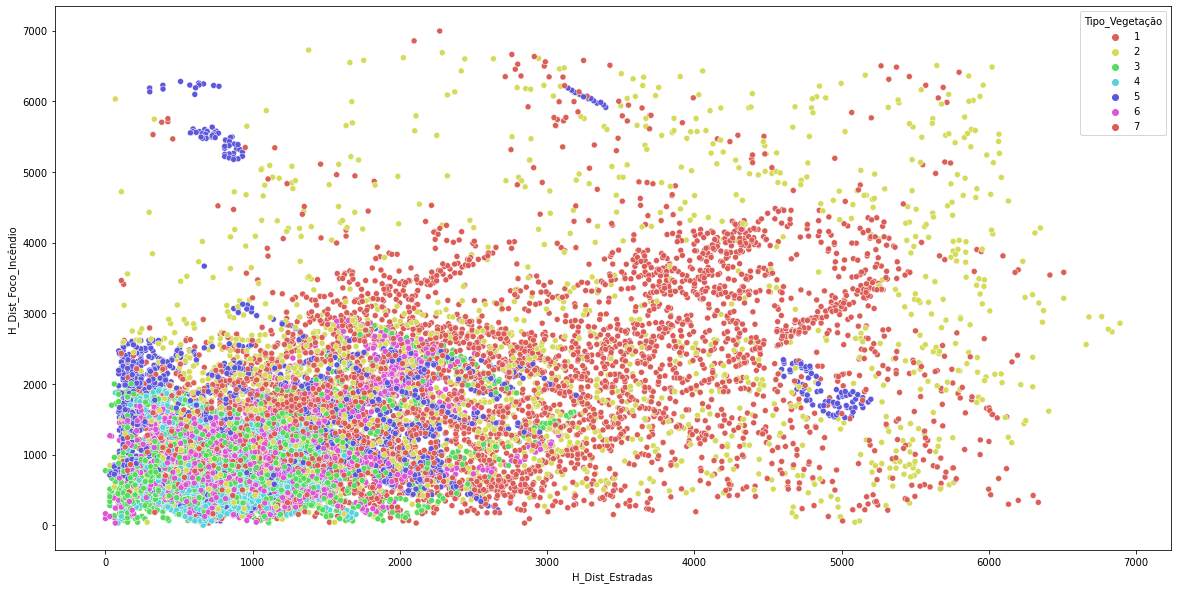

In [17]:
#Esse gráfico pode nos mostrar duas coisas:
#1- quanto mais proximos das estradas e dos focos de incêndio maior a variedade de plantas.
#2- A maior quantidade das áreas analisadas estão concentradas próximas as estradas

#Além disso, a presença da vegetação 5 (Aspen) em alguns pontos específicos podem estar evidenciando algum padrão.

sns.scatterplot(data = treino, hue="Tipo_Vegetação", palette="hls",
x='H_Dist_Estradas', y='H_Dist_Foco_Incêndio')

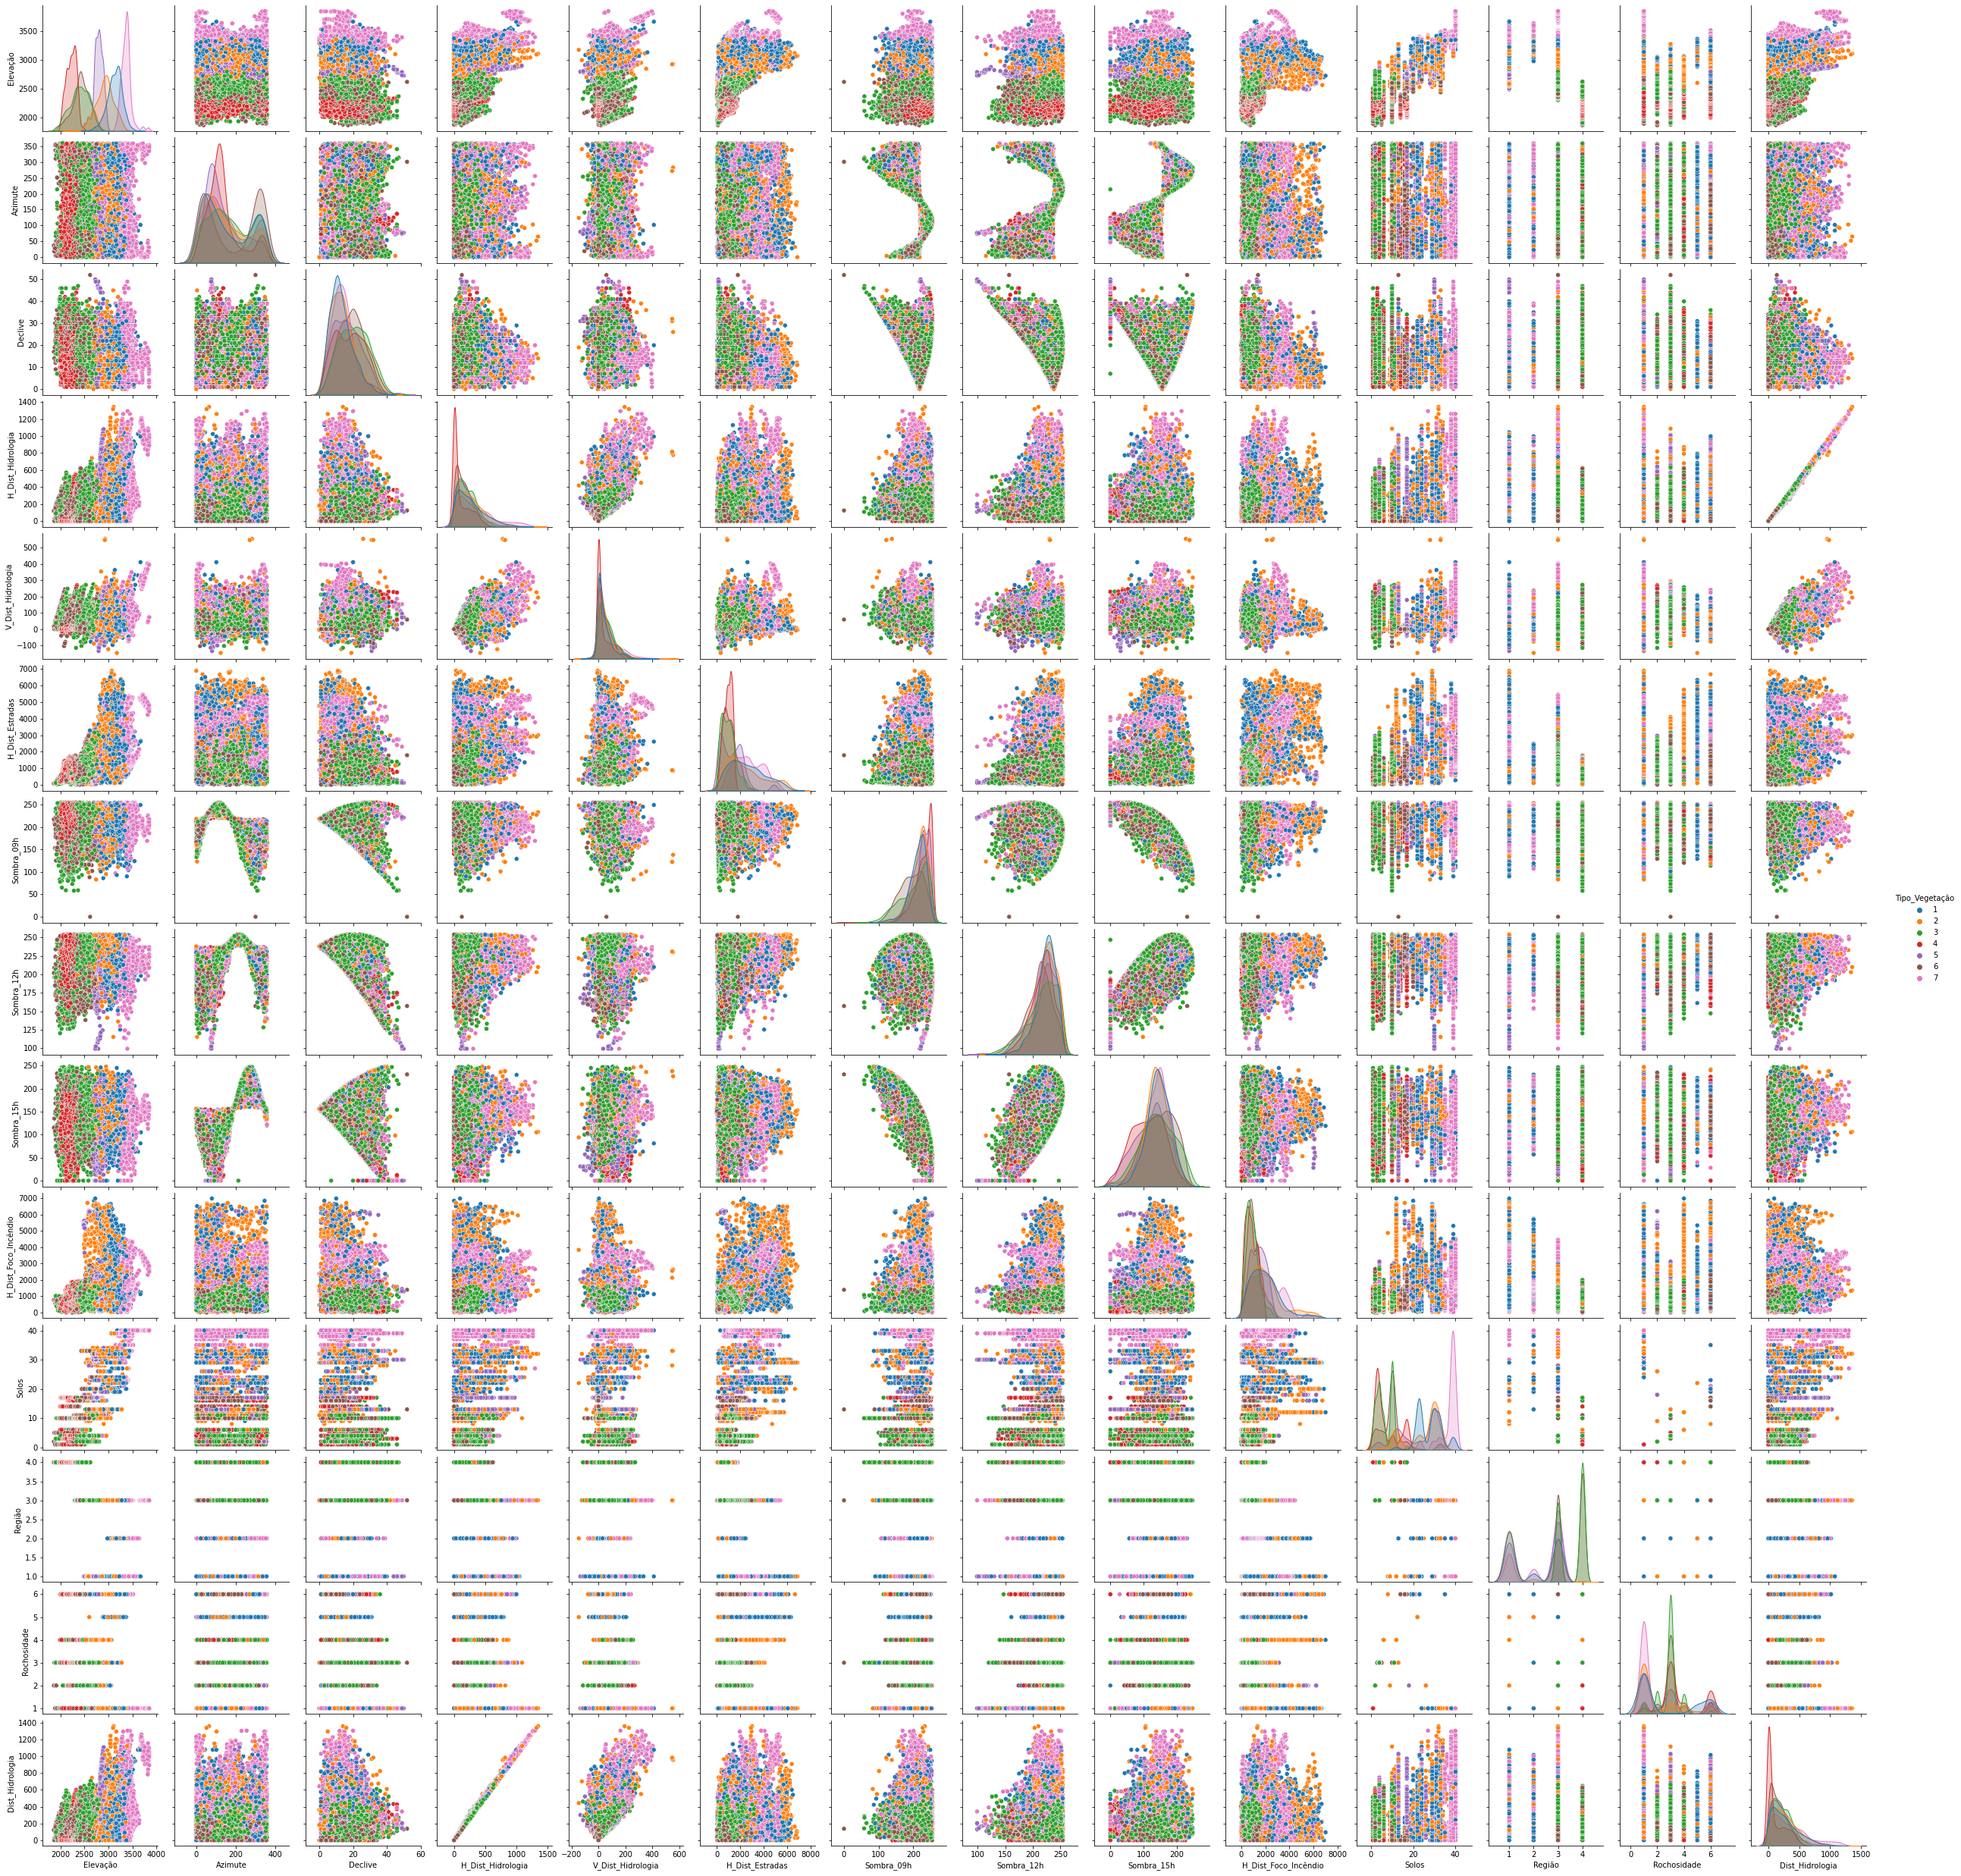

In [18]:
#Pairplot a fim de analisar correlações entre todas as variáveis e o tipo de vegetação.
#Podemos concluir coisas sobre como o tipo de vegetação se distribui em algumas circunstâncias.

lista_area = [f'Wilderness_Area{i}' for i in range(1,5)]
lista_sqrts = ['sqrt_V_Dist_Hidrologia','sqrt_H_Dist_Foco_Incêndio','sqrt_H_Dist_Hidrologia','sqrt_H_Dist_Estradas','sqrt_Dist_Hidrologia']
lista_pow = ['pow_V_Dist_Hidrologia','pow_H_Dist_Foco_Incêndio','pow_H_Dist_Hidrologia','pow_H_Dist_Estradas','pow_Dist_Hidrologia']
lista_drop = lista_solos+lista_area+lista_sqrts+['Id']+lista_pow

sns.pairplot(treino.drop(lista_drop,axis=1),hue='Tipo_Vegetação', palette= "tab10")

<AxesSubplot:>

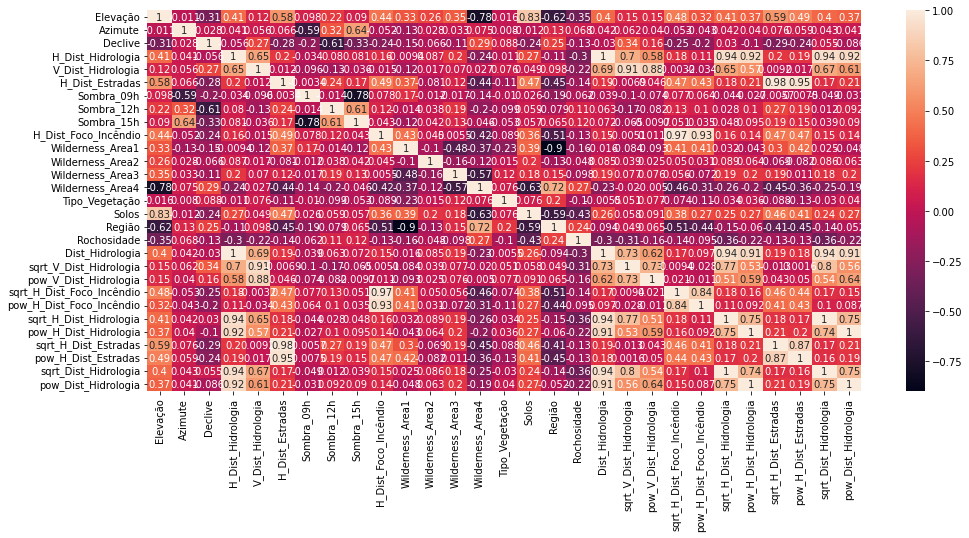

In [19]:
#Esse gráfico mostra a correlação entre as colunas do dataframe 
#Assim, podemos perceber que a região que é mais proxima dos focos de incendio é a 4, enquanto a mais distante é a 1.

df=treino.drop( columns =['Id']+lista_solos)
corr=df.corr()

teste = corr[corr['Tipo_Vegetação'] >= 0.1]

plt.rcParams['figure.figsize']=16,7
sns.heatmap(corr , annot= True)

<AxesSubplot:>

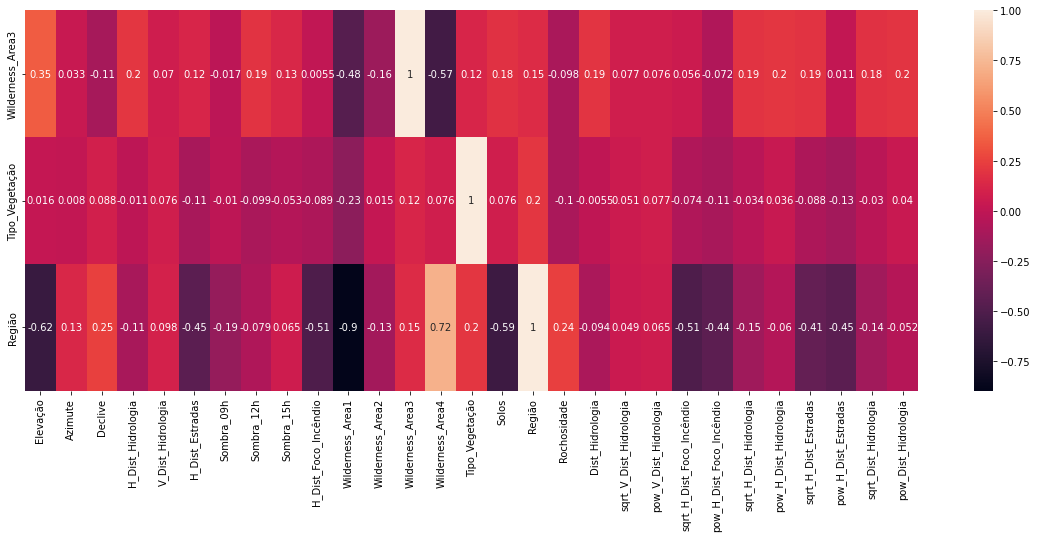

In [20]:
#Verificando apenas a correlação das colunas com 0.1 ou mais de correlation com a coluna alvo 'Tipo_Vegetação'

teste = corr[corr['Tipo_Vegetação'] >= 0.1]

plt.rcParams['figure.figsize']=20,7
sns.heatmap(teste , annot= True)

# Criando o modelo

Realizando as importações

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [36]:
#Definindo as matrizes X e Y

y = treino.Tipo_Vegetação
x = treino.drop(['Tipo_Vegetação','Id' ],axis=1)

#Criando os sets de treino e teste
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [37]:
#Definindo as matrizes X e Y para as regiões separadamente

for i in range(1,5):
    globals()[f"y_regiao{i}"] = globals()[f"df_regiao{i}_treino"].Tipo_Vegetação
    globals()[f"x_regiao{i}"] = globals()[f"df_regiao{i}_treino"].drop(['Tipo_Vegetação','Id' ],axis=1)

#Criando os sets de treino e teste para as regiões separadamente
for i in range(1,5):
    globals()[f"x_regiao{i}_train"],globals()[f"x_regiao{i}_test"],globals()[f"y_regiao{i}_train"],globals()[f"y_regiao{i}_test"] = train_test_split(globals()[f"x_regiao{i}"],globals()[f"y_regiao{i}"],test_size=0.2)


In [38]:
#Treinando os modelos

clf_RFC = RandomForestClassifier(n_estimators=120)
clf_RFC.fit(x_train,y_train)

clf_SGD = SGDClassifier()
clf_SGD.fit(x_train,y_train)

clf_Knei =KNeighborsClassifier()
clf_Knei.fit(x_train,y_train)

Gaus_NB = GaussianNB()
Gaus_NB.fit(x_train,y_train)

Percpt =Perceptron()
Percpt.fit(x_train,y_train)

extratree =ExtraTreesClassifier(n_estimators=120, max_features=None, min_samples_leaf=1, min_samples_split=2, random_state=42)
extratree.fit(x_train,y_train)

ExtraTreesClassifier(max_features=None, n_estimators=120, random_state=42)

In [39]:
#Validando os modelos
#Consistentemente os valroes do ExtraTrees são os melhores, com a única exceção de ser ultrapassado pelo RnadomForest em algumas circunstâncias
y_pred0 = clf_RFC.predict(x_test)
print(f'Acurácia RFC = {round(accuracy_score(y_pred0,y_test)*100,2)}%')

y_pred1 = clf_SGD.predict(x_test)
print(f'Acurácia SGD = {round(accuracy_score(y_pred1,y_test)*100,2)}%')

y_pred3 = clf_Knei.predict(x_test)
print(f'Acurácia Knei = {round(accuracy_score(y_pred3,y_test)*100,2)}%')

y_pred4 = Gaus_NB.predict(x_test)
print(f'Acurácia Gaus = {round(accuracy_score(y_pred4,y_test)*100,2)}%')

y_pred5 = Percpt.predict(x_test)
print(f'Acurácia Percep = {round(accuracy_score(y_pred5,y_test)*100,2)}%')

y_pred6 = extratree.predict(x_test)
print(f'Acurácia ETC = {round(accuracy_score(y_pred6,y_test)*100,2)}%')

Acurácia RFC = 87.57%
Acurácia SGD = 18.22%
Acurácia Knei = 51.26%
Acurácia Gaus = 31.71%
Acurácia Percep = 16.44%
Acurácia ETC = 89.62%


In [40]:
#Realizando a previsões com o dataframe final
x = final.drop(['Id'],axis=1)

#Exportando um dataframe para cada um dos modelos
lista_modelos = [clf_RFC,clf_SGD,clf_Knei,Gaus_NB,Percpt,extratree]
lista_modelos_reduzida = [clf_RFC,extratree]

def exporta_modelos(modelo):
    
    y = modelo.predict(x)
    submission = pd.DataFrame()
    submission['Id'] = final['Id']
    submission['Cover_Type'] = y
    submission['Cover_Type'].astype(int)
    submission.set_index('Id', inplace = True)

    submission.to_csv(f'submissions/submission_{modelo}.csv')

#Este laço de repetição está comentado para fins de performance do código.

# for i in lista_modelos:
#     exporta_modelos(i)

for i in lista_modelos_reduzida:
    exporta_modelos(i)

In [41]:
#Utilizando o melhor modelo encontrado(extratrees) para realizar a análise das regiões separadamente
for i in range(1,5):
    globals()[f'extratree_separado{i}'] = ExtraTreesClassifier(n_estimators=120, max_features=None, min_samples_leaf=1, min_samples_split=2, random_state=42)

for i in range(1,5):
    globals()[f'extratree_separado{i}'].fit(globals()[f"x_regiao{i}_train"],globals()[f"y_regiao{i}_train"])
    globals()[f"y_pred_regiao{i}"] = extratree.predict(globals()[f"x_regiao{i}_test"])

#Validando os modelos das regiões separadamente
for i in range(1,5):
    print(f'Acurácia Região{i} = {round(accuracy_score(globals()[f"y_pred_regiao{i}"],globals()[f"y_regiao{i}_test"])*100,2)}%')

Acurácia Região1 = 98.06%
Acurácia Região2 = 99.0%
Acurácia Região3 = 97.48%
Acurácia Região4 = 98.4%


In [46]:
#Realizando a previsões com o dataframe final utilizando o modelo das regiões separadas
for i in range(1,5):
    globals()[f"x_regiao{i}"] = globals()[f"df_regiao{i}_final"].drop(['Id' ],axis=1)

for i in range(1,5):
    globals()[f"y_regiao{i}"] = globals()[f'extratree_separado{i}'].predict(globals()[f"x_regiao{i}"])

frames = []
for i in range(1,5):
    globals()[f"submission_regiao{i}"] = pd.DataFrame()
    globals()[f"submission_regiao{i}"]['Id'] = globals()[f"df_regiao{i}_final"]['Id']
    globals()[f"submission_regiao{i}"]['Cover_Type'] = globals()[f"y_regiao{i}"]
    globals()[f"submission_regiao{i}"]['Cover_Type'].astype(int)
    globals()[f"submission_regiao{i}"].set_index('Id', inplace = True)
    frames.append(globals()[f"submission_regiao{i}"])

submission_final = pd.concat(frames)
submission_final.sort_values(by=['Id'], ascending=True, inplace=True)
submission_final.to_csv(f'submissions/submission_ExtraTreesClassifier_Regiões_Separadas.csv')